## Data Augmentation (synthatic data generation for image)


In [ ]:
import tensorflow as tf
from tensorflow import keras
# Instead of 'from keras.preprocessing import Image', use the following:
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt # Import pyplot instead of the entire matplotlib module

In [ ]:
img=load_img('frog image.jpg', target_size=(150,200))

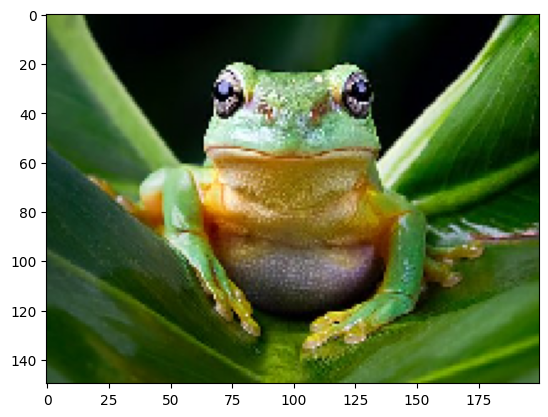

In [ ]:
plt.imshow(img)

In [ ]:
datagen=ImageDataGenerator(
    rotation_range=40, #rotate image by 40 degree
    width_shift_range=0.2, #
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

In [ ]:
img1=img_to_array(img)
img1.shape

(150, 200, 3)

In [ ]:
input_batch=img1.reshape((1,)+img1.shape)
input_batch.shape

(1, 150, 200, 3)

In [ ]:
#Code which will generate new images
i=0 #starting point

#running a loop to generate images from our input_batch(the main image), and datagen settings we did
for output in datagen.flow(input_batch, batch_size=1, save_to_dir='/content/new images of frog', save_prefix='frog', save_format='jpeg'):
  i+=1  #add one in i after each loop
  if i>5: #when i is greater than 5 stop the loop
    break
#The code will generate random images and will save it in the directory mentioned above

## Data Augmentation (synthatic data generation for NLP)

### 1. Synonym Replacement

In [ ]:

#Synonym Replacement
import nltk
from nltk.corpus import wordnet
import random

nltk.download("wordnet")

def synonym_replacement(sentence, n=2):
    words = sentence.split()
    new_words = words.copy()
    random.shuffle(new_words)
    for word in new_words:
        synonyms = wordnet.synsets(word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            sentence = sentence.replace(word, synonym, 1)
            n -= 1
        if n <= 0:
            break
    return sentence

# Example sentence
sentence = "The girl is walking on the street."
print("Original:", sentence)
print("Augmented:", synonym_replacement(sentence))

### 2. Random Insertion and Deletion

In [ ]:
#Random Insertion and Deletion
import random

def random_insertion(sentence, word_list, n=1):
    words = sentence.split()
    for _ in range(n):
        random_word = random.choice(word_list)
        random_position = random.randint(0, len(words))
        words.insert(random_position, random_word)
    return " ".join(words)

def random_deletion(sentence, p=0.2):
    words = sentence.split()
    if len(words) == 1:
        return sentence
    return " ".join([word for word in words if random.random() > p])

# Example usage
sentence = "The cat sat on the mat."
print("Insertion:", random_insertion(sentence, ["fluffy", "tiny"]))
print("Deletion:", random_deletion(sentence))

### 3. Back Translation

In [ ]:
#Back translation
#This technique involves translating a sentence to another language and then translating it back to the original language

from transformers import MarianMTModel, MarianTokenizer

# Load translation model
model_name = "Helsinki-NLP/opus-mt-en-de"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

def back_translate(sentence):
    # English to German
    tokens = tokenizer(sentence, return_tensors="pt", padding=True)
    translated = model.generate(**tokens)
    german = tokenizer.decode(translated[0], skip_special_tokens=True)

    # German back to English
    model_name_back = "Helsinki-NLP/opus-mt-de-en"
    tokenizer_back = MarianTokenizer.from_pretrained(model_name_back)
    model_back = MarianMTModel.from_pretrained(model_name_back)
    tokens_back = tokenizer_back(german, return_tensors="pt", padding=True)
    back_translated = model_back.generate(**tokens_back)
    return tokenizer_back.decode(back_translated[0], skip_special_tokens=True)

# Example sentence
sentence = "The boy came from the school."
print("Original:", sentence)
print("Back-translated:", back_translate(sentence))

### 4. Noise injection - This involves adding small errors, such as typos or misspellings

In [ ]:
#Noise injection - This involves adding small errors, such as typos or misspellings"
import random

def noise_injection(sentence, p=0.2):
    words = list(sentence)
    noisy_sentence = []
    for word in words:
        if random.random() < p:
            noisy_sentence.append(word + random.choice("abcdefghijklmnopqrstuvwxyz"))
        else:
            noisy_sentence.append(word)
    return "".join(noisy_sentence)

# Example usage
sentence = "The cat sat on the mat."
print("Original:", sentence)
print("Noisy version:", noise_injection(sentence))

### 5. Contextual Embedding-Based Augmentation (EDA)

In [ ]:
#Contextual Embedding-Based Augmentation (EDA)
import random
import torch
from transformers import BertTokenizer, BertForMaskedLM

# Load BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForMaskedLM.from_pretrained("bert-base-uncased")

def contextual_embedding_augmentation(sentence, num_replacements=1):
    words = sentence.split()
    # Select random words for replacement
    random_word_indices = random.sample(range(len(words)), num_replacements)

    for index in random_word_indices:
        original_word = words[index]

        # Mask the word to be replaced
        tokens = tokenizer(sentence, return_tensors="pt")
        tokens["input_ids"][0, index + 1] = tokenizer.mask_token_id  # Mask the selected word

        # Predict replacements for the masked word
        with torch.no_grad():
            outputs = model(**tokens)
            predictions = outputs.logits

        # Get the top prediction for the masked token
        mask_token_index = torch.where(tokens["input_ids"] == tokenizer.mask_token_id)[1]
        predicted_token_id = predictions[0, mask_token_index].topk(1).indices[0].item()
        predicted_word = tokenizer.decode([predicted_token_id])

        # Replace the original word with the predicted word
        words[index] = predicted_word

    return " ".join(words)

# Example sentence
sentence = "The cat sat on the mat."
print("Original:", sentence)
print("Augmented:", contextual_embedding_augmentation(sentence))